# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

Reading The Csv File

In [2]:
df = pd.read_csv('../data/raw_rating_data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


## Descriptive Statistics

#### Headline Length

In [6]:
# Creating a new column for the headline length
df['headline_length'] = df['headline'].apply(len)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [7]:
# Obtain basic statistics
statistics = df['headline_length'].describe()

print(statistics)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Top 10 publishers

In [8]:
top_10_publishers = df['publisher'].value_counts().nlargest(10)
top_10_publishers

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

plot for top publishers

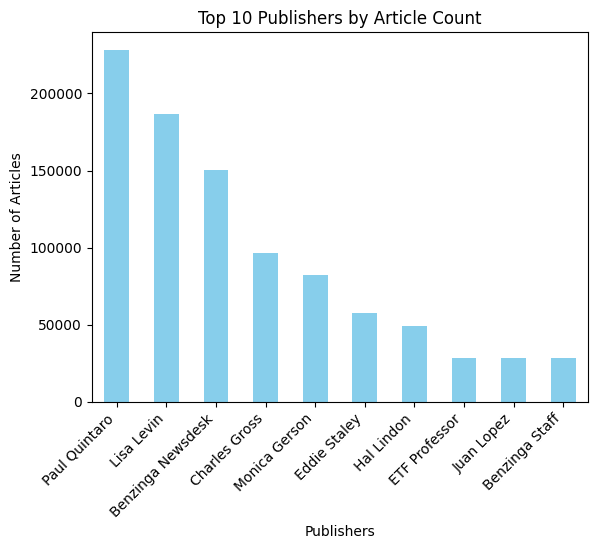

In [9]:
plot_top_publishers(df)

##### Analyze Publication Data

In [10]:
# Trends in publication dates and Analyze the publication dates

date_analysis = publication_dates(df)
print("\nTop 5 Days with Most Articles:")
print(date_analysis['top_days'])

print("\nArticle Distribution by Weekday:")
print(date_analysis['weekday_counts'])

print("\n Monthly Trends ")
print(date_analysis['monthly_counts'])

c:\Users\Leul\Nova-Financial-Solutions-Data-Analysis\scripts\utils.py:43: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df.groupby(df['date'].dt.to_period('M').dt.to_timestamp()).size()



Top 5 Days with Most Articles:
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1594
2020-02-27    1567
2020-03-06    1428
dtype: int64

Article Distribution by Weekday:
date
Thursday     302595
Wednesday    300940
Tuesday      296470
Monday       265164
Friday       217892
Sunday        16514
Saturday       7753
Name: count, dtype: int64

 Monthly Trends 
date
2009-02-01        1
2009-04-01        3
2009-05-01       12
2009-06-01       40
2009-07-01       75
              ...  
2020-02-01    18879
2020-03-01    24994
2020-04-01    20757
2020-05-01    17992
2020-06-01     6447
Length: 136, dtype: int64


Analyze the publication dates to see trends over time

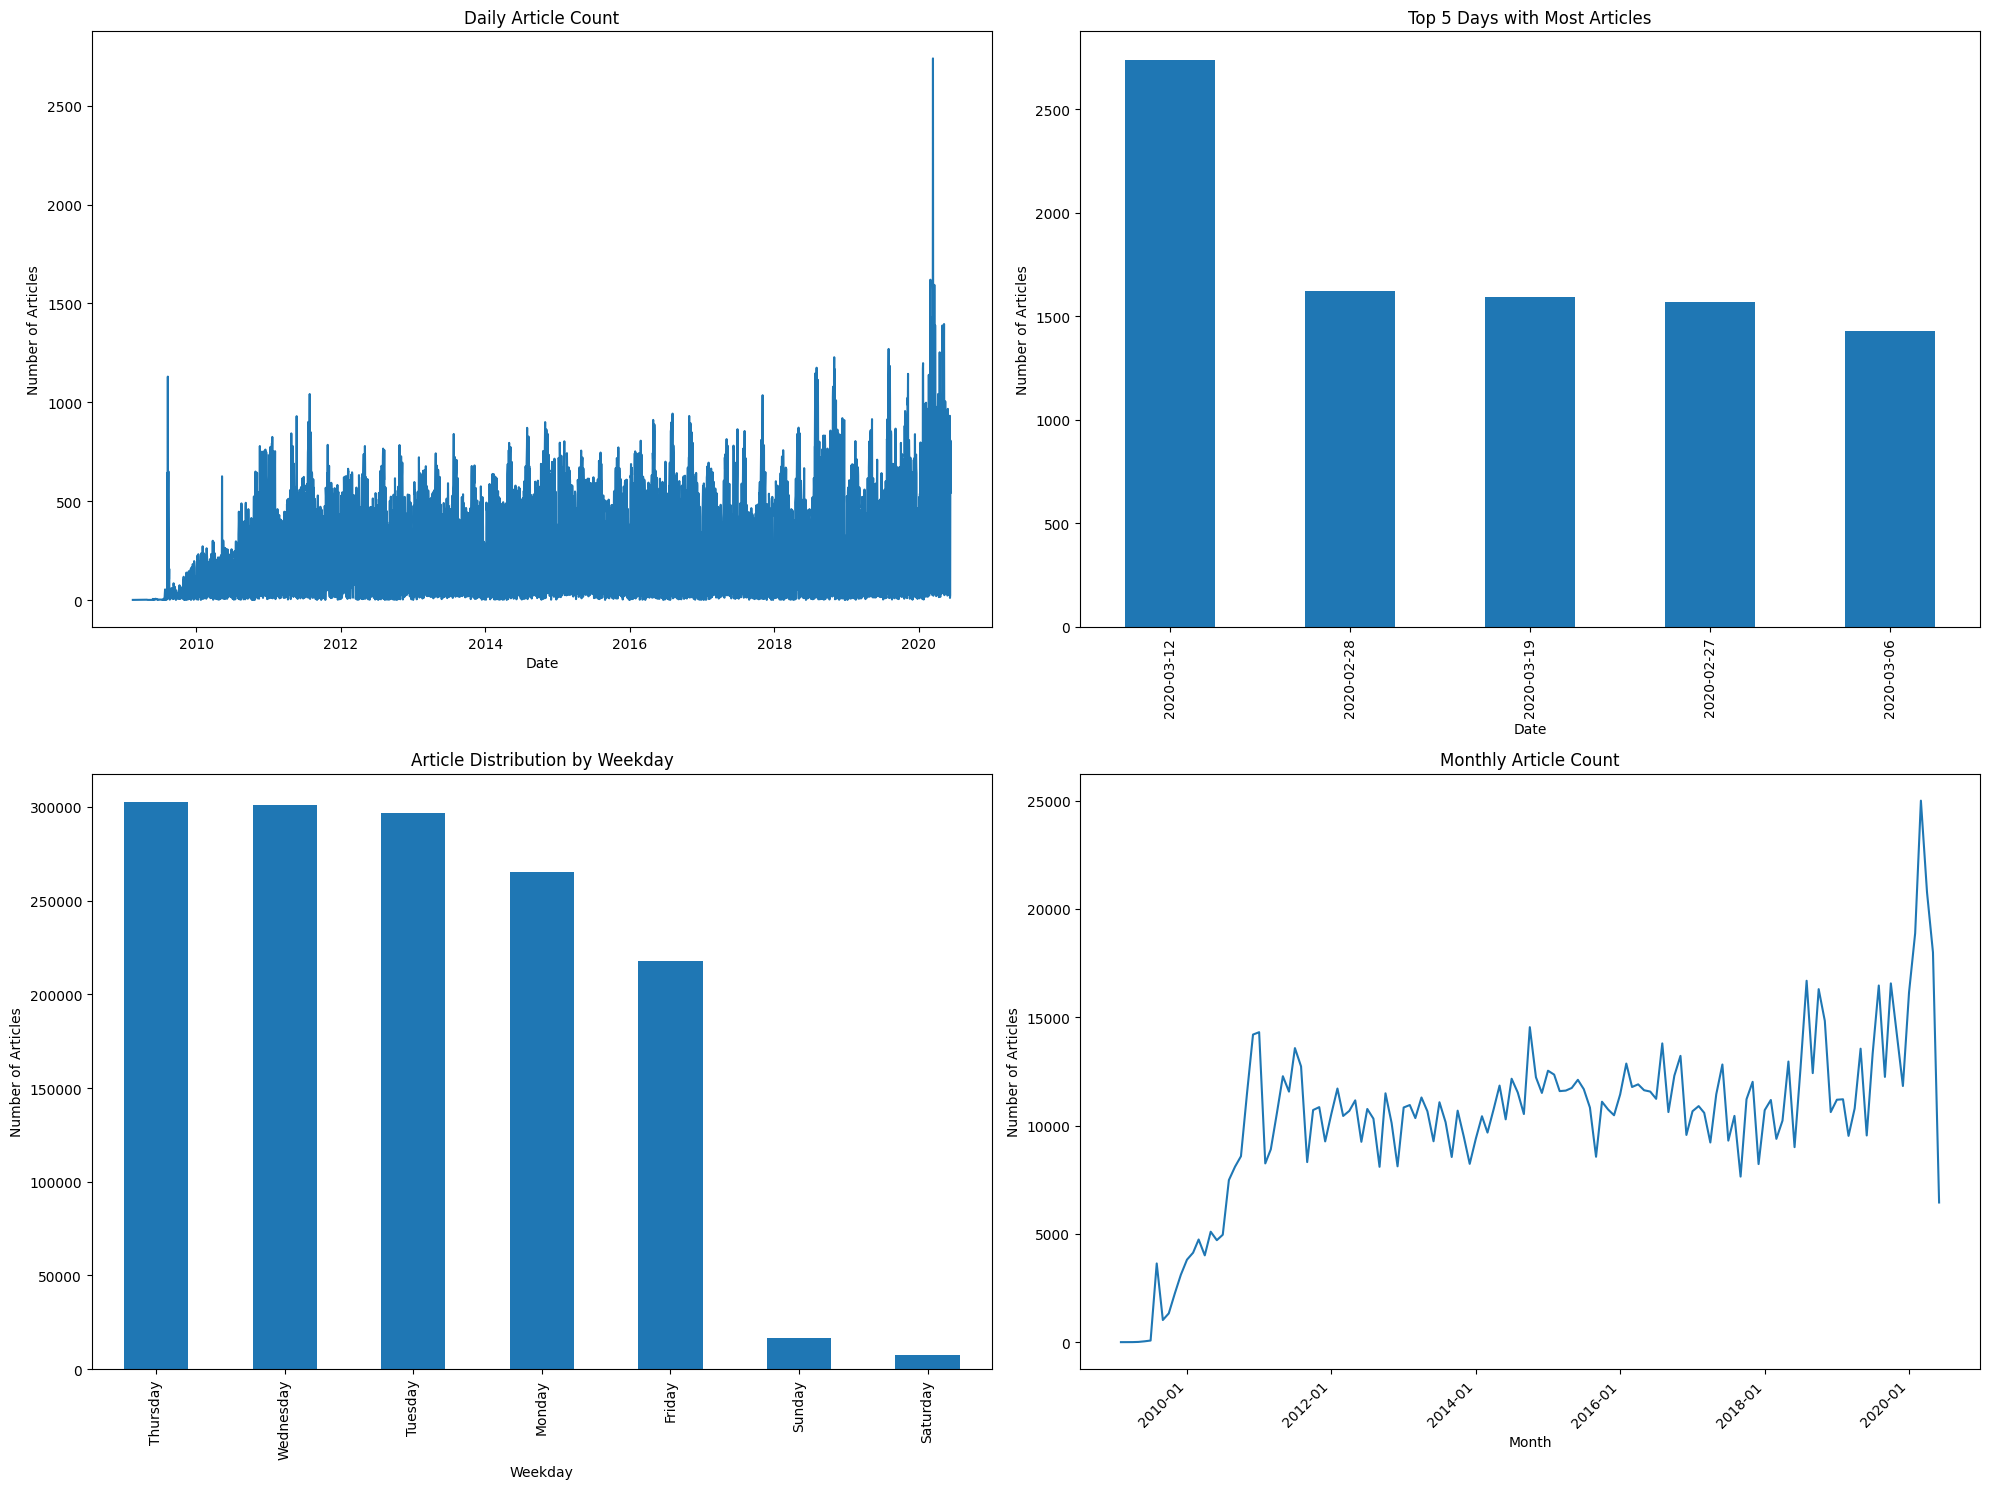

In [11]:
fig = plot_publication_trends(date_analysis)

# Text Analysis( Sentiment analysis )

## Tesla Data

In [3]:
tesla_df = df[df['stock'] == 'TSLA']
tesla_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA


#### Perform sentiment analysis on headlines

In [12]:

# To Check the polarity
tesla_df['sentiment'] = tesla_df['headline'].apply(get_sentiment)
tesla_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA,0.193636
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA,0.183333
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA,0.000000
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA,0.000000
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA,0.000000


In [31]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 1255221 to 1257095
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1875 non-null   int64  
 1   headline            1875 non-null   object 
 2   url                 1875 non-null   object 
 3   publisher           1875 non-null   object 
 4   date                1875 non-null   object 
 5   stock               1875 non-null   object 
 6   sentiment           1875 non-null   float64
 7   sentiment_category  1875 non-null   object 
 8   subjectivity        1875 non-null   float64
 9   processed_text      1875 non-null   object 
 10  tokens              1875 non-null   object 
 11  keywords            1875 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 190.4+ KB


Sentiment Category

In [13]:
tesla_df['sentiment_category'] = tesla_df['sentiment'].apply(categorize_sentiment)
tesla_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA,0.193636,positive
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA,0.183333,positive
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA,0.000000,neutral
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA,0.000000,neutral
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA,0.000000,neutral


In [16]:
# Counting the number of sentiment categories
sentiment_category_count = tesla_df.value_counts('sentiment_category')
sentiment_category_count

sentiment_category
neutral     1054
positive     609
negative     212
Name: count, dtype: int64

In [20]:
# To check the subjectivity

tesla_df['subjectivity'] = tesla_df['headline'].apply(get_subjectivity)
tesla_df

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category,subjectivity
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA,0.193636,positive,0.542727
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA,0.183333,positive,0.500000
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA,0.000000,neutral,0.000000
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA,0.000000,neutral,0.000000
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA,0.000000,neutral,0.000000
...,...,...,...,...,...,...,...,...,...
1257091,1263065,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00,TSLA,0.000000,neutral,0.000000
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00,TSLA,0.000000,neutral,0.100000
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00,TSLA,0.000000,neutral,0.500000
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00,TSLA,0.066667,positive,0.483333


Sentiment Distribution

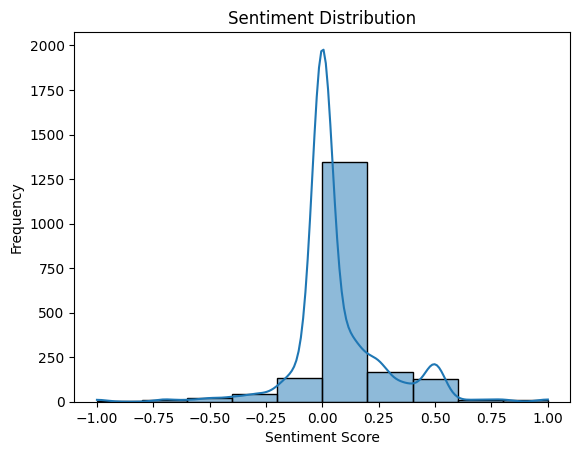

In [21]:
sns.histplot(tesla_df['sentiment'], bins=10, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Use natural language processing to identify common keywords or phrases

In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Download necessary NLTK data
# nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Step 1: Preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

tesla_df['processed_text'] = tesla_df['headline'].apply(preprocess_text)

# Step 2: Tokenize the text
tesla_df['tokens'] = tesla_df['processed_text'].apply(word_tokenize)

# Step 3: Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

tesla_df['tokens'] = tesla_df['tokens'].apply(remove_stopwords)

# Step 4: Extract Keywords or Significant Phrases
# Find the most common words (keywords)
all_words = [word for tokens in tesla_df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

# Display the most common words
common_words = freq_dist.most_common(10)
print("Most common keywords or phrases:")
print(common_words)

# Optionally, create a column with the most common keywords for each text
def extract_keywords(tokens):
    return [word for word in tokens if word in dict(common_words)]

tesla_df['keywords'] = tesla_df['tokens'].apply(extract_keywords)

# Display the DataFrame with extracted keywords
print(tesla_df[['keywords']])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Leul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common keywords or phrases:
[('tesla', 1161), ('says', 207), ('model', 199), ('shares', 187), ('price', 187), ('target', 177), ('3', 170), ('musk', 167), ('stocks', 163), ('elon', 146)]
                                    keywords
1255221                               [musk]
1255222                  [tesla, elon, musk]
1255223                              [tesla]
1255224                                   []
1255225                                   []
...                                      ...
1257091                                   []
1257092                                   []
1257093                  [tesla, elon, musk]
1257094  [target, tesla, model, 3, model, 3]
1257095       [tesla, shares, price, target]

[1875 rows x 1 columns]


In [35]:
tesla_df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category,subjectivity,processed_text,tokens,keywords
1255221,1261140,Tesla's Stock Closes At All-Time High As Musk ...,https://www.benzinga.com/news/20/06/16225150/t...,Drew Levine,2020-06-10 17:02:47-04:00,TSLA,0.193636,positive,0.542727,teslas stock closes at alltime high as musk pu...,"[teslas, stock, closes, alltime, high, musk, p...",[musk]
1255222,1261141,'Tesla factory workplace safety is 5% better t...,https://www.benzinga.com/news/20/06/16225621/t...,Benzinga Newsdesk,2020-06-10 15:08:09-04:00,TSLA,0.183333,positive,0.500000,tesla factory workplace safety is 5 better tha...,"[tesla, factory, workplace, safety, 5, better,...","[tesla, elon, musk]"
1255223,1261142,'Tesla hacker unlocks Performance upgrade and ...,https://www.benzinga.com/news/20/06/16224205/t...,Benzinga Newsdesk,2020-06-10 12:41:58-04:00,TSLA,0.000000,neutral,0.000000,tesla hacker unlocks performance upgrade and a...,"[tesla, hacker, unlocks, performance, upgrade,...",[tesla]
1255224,1261143,GM On Track To Spend $20B On EV And AV Develop...,https://www.benzinga.com/news/20/06/16223414/g...,Benzinga Newsdesk,2020-06-10 11:33:18-04:00,TSLA,0.000000,neutral,0.000000,gm on track to spend 20b on ev and av developm...,"[gm, track, spend, 20b, ev, av, development, 2...",[]
1255225,1261144,"Tesla's Journey To $1,000 In 2020",https://www.benzinga.com/news/20/06/16222035/t...,Wayne Duggan,2020-06-10 10:15:07-04:00,TSLA,0.000000,neutral,0.000000,teslas journey to 1000 in 2020,"[teslas, journey, 1000, 2020]",[]


Rows with no common keywords

In [34]:

empty_count = sum(1 for row in tesla_df['keywords'] if not row)

print(f"Number of empty rows: {empty_count}")

Number of empty rows: 417
